## Importing pandas
 - for data manipulation purpose we use pandas


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loadind the DataSet
- load the csv file into a pandas DataFrame using read_csv()

In [17]:
raw_data = pd.read_csv('./data/IEA_Global_EV_Data_2024.csv')

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [19]:
raw_data.head(10)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
7,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [20]:
display(raw_data.value_counts().__len__())
display(raw_data.columns)

12654

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

### Cleaning the data
 - remove the unwanted rows from `category` like `Projections-APS` & `Projection-STEPS`
 - filtering only the `EV sales` in `parameter` column 

In [21]:
sales = raw_data[raw_data['parameter'] == "EV sales"]
sales = sales[sales['category'] == "Historical"]
print("total rows in sales DF =",sales.value_counts().__len__())


total rows in sales DF = 2501


### Saving the Preprocessed data for duture use

In [22]:
sales.to_csv("data/sales.csv")

In [23]:
print("Total EV Sales in past: ",sales['value'].sum().astype(int))
sales['region'].nunique()

Total EV Sales in past:  107261059


52

### Plotting Bar Chart to visualize the Ev Sales over year 

## Plotly express line chart

In [35]:
yearly_sales = sales.groupby('year')['value'].sum().reset_index()
yearly_sales['value'] = yearly_sales['value'].astype(int)
# display(yearly_sales)

import plotly.express as px

line_fig = px.line(yearly_sales, yearly_sales['year'], yearly_sales['value'], hover_data="value")

line_fig.show()

## Line chart in matplotlib

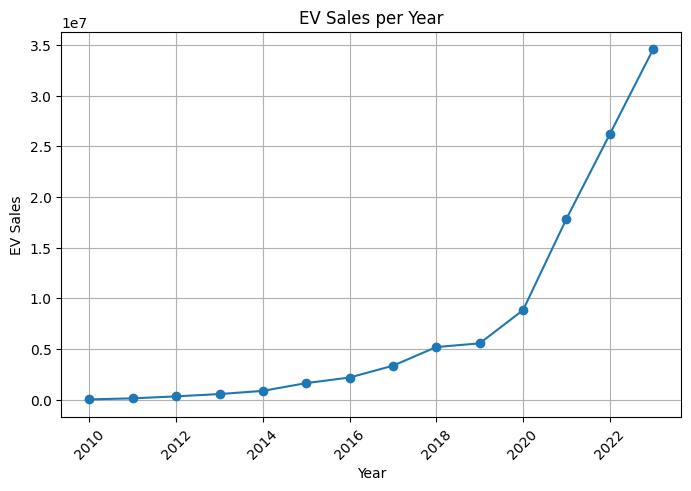

In [34]:
plt.figure(figsize=(8,5))
plt.plot(yearly_sales['year'], yearly_sales['value'], marker="o")
plt.title('EV Sales per Year')
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting Sales data on heat map to see which country is apdating EV more

In [ ]:
import plotly.express as px

country_sales = sales.groupby('region')['value'].sum().reset_index()
country_sales.columns = ['Country', 'Total EV Sales']

In [ ]:
sort = country_sales.sort_values(by='Total EV Sales', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(
    data=sort,
    y='Country',
    x='Total EV Sales',
    palette='viridis'
)
plt.title('Total EV Sales by Country')
plt.xlabel('EV Sales (Total)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [ ]:
fig = px.choropleth(
    country_sales, 
    locations='Country',
    locationmode='country names',
    color='Total EV Sales',
    color_continuous_scale='Viridis',
    title='Global EV Sales by Country',
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

## Importing Machine Learning Library
- from sci-kit learn, import the train_test_split method for sliptting the dataset into two one for `Training the model` another one for `Testing the model`

In [42]:
from sklearn.model_selection import train_test_split

train_df, test = train_test_split(yearly_sales, test_size=.33, train_size=.67, random_state=44)


In [61]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import numpy as np

adfuller_result = adfuller(train_df['year'])

print(f"ADF Statistic: {adfuller_result[0]}\np-value: {adfuller_result[1]}\n")


if adfuller_result[1] > 0.05:
    print("diff'in is needed")
else: 
    print("diff'in is not needed")

p = range(0,4)
d = range(0,3)
q = range(0,4)
pdq = list(itertools.product(p,d,q))

best_aic = np.inf
best_order = None
best_model = None

for order in pdq: 
    try:
        model = ARIMA(train_df, order=order)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
            best_model = model
    except:
        continue

print(f"Best ARIMA order is {best_order} with AIC {best_aic}")

ADF Statistic: -4.005867935358978
p-value: 0.001380094790714358

diff'in is not needed
Best ARIMA order is None with AIC inf


/home/rekcah/projects/college_projects/EV_Sales_Prediction/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/home/rekcah/projects/college_projects/EV_Sales_Prediction/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/home/rekcah/projects/college_projects/EV_Sales_Prediction/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/home/rekcah/projects/college_projects/EV_Sales_Prediction/.venv/lib/python3.13/site-